Material basado en el curo "Advanced Deep Learning and Reinforcement Learning" de UCL:



*   https://youtu.be/JO0LwmIlWw0
*   https://github.com/enggen/DeepMind-Advanced-Deep-Learning-and-Reinforcement-Learning/blob/master/lecture%20slides/dl_02%20Introduction%20to%20TensorFlow.pdf



In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


## TensorFlow : La idea base

TensorFlow esta compuesto principalmente de 2 partes :

*   **Librería para definir grafos de computo** : la API de TensorFlow 
*   **Motor de ejecución** : ejecutar los grafos mencionados en gran variedad de hardware.

Entre muchas de sus ventajas podemos mencionar algunas importantes:



*   Rica librería de operaciones y funciones comunes en data science ,especialmente en machine learning.
*   **Autograd/autodiff**(https://en.wikipedia.org/wiki/Automatic_differentiation): conjunto de técnicas para evaluar numéricamente (contrario a analíticamente o simbólicamente) derivadas de funciones definidas en un programa de computadora. Esto nos ayuda a calcular diversos objetos de cálculo difrencial:

  * Derivadas
  * Gradientes (Vector)
  * Jacobianos (Matriz)
  * Objetos de orden superior (segundas derivadas, matriz Hessiana)





## Grafos de Computo

Abstracción basada en teoría de grafos que nos permite describir computos como un grafo dirigido. https://es.wikipedia.org/wiki/Grafo_dirigido

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Directed_acyclic_graph.png">

###### Fuente: Wikipedia

En el caso de TensorFlow:



*   Las **arístas** corresponden a datos numéricos en arreglos multidimensionales (**Tensores**) 
*   Los **nodos**(o vértices) son operaciones sobre los tensores :  crear o manipular tensores de acuerdo a reglas específicas (**Operaciones**)


<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Ejemplos_de_aristas.png">

###### Fuente: Wikipedia

## Programas como Grafos de Computo

Comparemos un programa de computo "estandar" contra un grafo de computo:

### Programa Estandar
Un programa "estandar" está conformado por 2( entre otras) cosas:



*   Colección de operaciones primitivas
*   Un **orden** en las cuales deseamos que se ejecuten estas operaciones.



In [3]:
a = 10
b = 20
tmp1 =  a * b
tmp2 = a + b
res = tmp1 / tmp2
print(res)

6.666666666666667









### Grafo de Computo

Comparte similitud con el programa estandar pero tiene una diferencia importante:

* También basado en una colección de operaciones primitivas.
* En lugar de especificar el orden de ejecución, específicamos exclusivamente las **dependencias** entre estas operaciones.

Especifíca como la salidas de las operaciones fluyen de una a otra. Si los datos son tensores tenemos **Tensores fluyendo**(TensorFlow)


<img src="https://drive.google.com/uc?id=1WA95O9XYXVrkWGKb_e8ECsvsnR4SG9qK">

###### Fuente: Wikipedia

### Calendarización/ejecución Basada en Dependencias


* Permite aprovechar el paralelismo del hardware a través de ejecutar en paralelo
operaciones que no dependen entre sí y así obtener un mejor performance.  
* El programador no se debe preocupar por los detalles internos del hardware



<img src="https://drive.google.com/uc?id=1Otuuiro9gi_q_cQS_a8F6cqaJcUJhWf4">

###### Fuente: Wikipedia

In [4]:
a = 10
b = 20
tmp1 =  a * b
tmp2 = a + b
res = tmp1 / tmp2
print(res)

6.666666666666667


In [5]:
# Equivalente del programa anterior en TensorFlow

a = tf.constant(10) #operación en el grafo que "genera" un tensor
b = tf.constant(20) #operación en el grafo que "genera" un tensor

t1 = tf.multiply(a,b) # operación en el grafo que multiplica elemento a elemento
t2 = tf.add(a,b) # operación en el grafo que suma elemento a elemento
res = tf.divide(t1,t2) # operación en el grafo que divide elemento a elemento

tf.print(res) # operación en el grafo que imprime el valor de un tensor

<tf.Operation 'PrintV2' type=PrintV2>

Que pasa si no usamos tf.print  y usamos el print normal ?

In [6]:
print(res)

Tensor("truediv:0", shape=(), dtype=float64)


Puede parecer extraño que no se obtuvo el valor (6.666)  ni con tf.print  ni con el print de Python. Esto se debe a que en Tensorflow hay 2 etapas:



*   **Definición del grafo**
*   **Ejecución del grafo.**

Las sentencias especificadas solo definen el grafo pero no se ha ejecutado, por lo tanto ningún calculo ha sido realizado.



*   la variable "res" contiene una referencia a un tensor en el grafo
*   La operación tf.print(res) solo agregó al grafo una operación de print pero NO SE HA EJECUTADO.
*   El hacer print(res) imprime la referencia al tensor en el grafo.







### Terminología de TensorFlow

Los 2 objetos base de teoría de grafos en TensorFlow son llamados:



*   **Ops** : las operaciones sobre los datos ( nodos o vértices de teoría de grafos)
<img src="https://drive.google.com/uc?id=1L0G67TtTMV1nSJfwgBO3kXPSpCOMpIZd">

  ###### Fuente: Deepmind y UCL


*   **Tensor** : los datos que fluyen entre las operaciones (arístas en teoría de grafos)
<img src="https://drive.google.com/uc?id=1mE6iBgbcEozuCOYqfgb7RvbLVf4iG2PL">

  ###### Fuente: Deepmind y UCL



### Definición vs Ejecución

Como se mencionó , un programa de tensorflow esta compuesto de 2 partes:



1.   **Definición** del grafo de computo
2.   **Ejecución** del grafo de computo(o un subconjunto del mismo).

Cuando definimos el grafo hacemos uso de las funciones de la **librería** de TensorFlow para especificar los computos como un objeto **tf.Graph**.

En tiempo de ejecución hacemos uso del **runtime**  de TensorFlow para ejecutar (un subconjunto) de de los computos a través de un objeto **tf.Session**



### tf.Graph



*   Describe computos a través de **Ops** y **Tensores**
*   El concepto de **Tensor** es el mismo visto previamente con NumPy (con algunas diferencias en programación).
  *   Los tensores pueden tener una forma (shape) y un tipo de dato, pero no tienen valores reales.
  *   Aveces la forma(shape) del tensor puede derivarse del grafo (**inferencia de grafo**)





In [7]:
a = tf.zeros((int(1e12),int(1e12))) # operación permitida , solo se define la operación pero no se ejecuta,NO RESERVA MEMORIA
#a = np.zeros((int(1e12),int(1e12))) # operación erronea (out of memory error)

Ejecución perezoza : lazy evaluation

* Los tensores pueden tener una forma (shape) y un tipo de dato, pero no tienen valores reales.
 
*   Aveces la forma(shape) del tensor puede derivarse del grafo (inferencia de forma)


In [8]:
a = tf.zeros((10,10))
b = tf.concat([a,a],axis = 0)

print(a)
print(b)

Tensor("zeros_1:0", shape=(10, 10), dtype=float32)
Tensor("concat:0", shape=(20, 10), dtype=float32)


### tf.Session

Componente de TensorFlow encargado de llevar a cabo(y calendarizar) los computos posiblemente en múltiples piezas de hardware. 

*   Lleva a cabo los computos
*   **session.run(tensor)** ejecuta el grafo y retorna el valor del **tensor**
*   **session.run([t1,t2,...])** ejecuta el grafo y devuelve el valor de todos los **tensores en la lista **



In [9]:
# definir el grafo
a = tf.constant(1.0)
b = tf.constant(1.0)
c = tf.constant(4.0)
d = tf.add(tf.add(a,b),c)

# executar el grafo
with tf.Session() as session:
  print(session.run(d)) 

6.0


In [10]:
# definir el grafo
a = tf.constant(1.0)
b = tf.constant(1.0)
c = tf.constant(4.0)
d = tf.div(tf.add(a,b),c)

# executar el grafo
with tf.Session() as session:
  print(session.run([d,c])) 

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
[0.5, 4.0]


### Modelo de ejecución

Cuando se ejecuta **session.run**, TensorFlow identifica el **mínimo conjunto de nodos**(teoría de grafos) que debe ser ejecutado para lograr realizar los computos del tensor solicutado. Esto a través de las dependencias entre nodos.



*   TensorFlow esta "enterado" de todas las dependencias , y adicionalmente el programador puede agregar dependencias a través de **Ops** especiales.
*   TensorFlow puede programar la ejecución de **Ops** que no dependen entre sí en paralelo a través del hardware disponible : **cores,dispositivos** y **máquinas**




### Lenguajes de Programación

Tensorflow tiene soporte para múltiples lenguajes de programación:



*   Python : el lenguaje principal (y el usado en este curso)
*   C++ : La mayoría del backend de tensorflow esta escrito en C++ y puede ser usado directamente
*   Go, Java : En etapa experimental
*   Haskell, Rust : Mayormente soportado por la comunidad open-source.

Sea cual sea el lenguaje usado, la mayoría de los computos se realizan  en el 
altamente optimo backend de Tensorflow en C++ (El lenguaje usado solo funciona como una interfaz hacia C++).



### Variables (tf.Variable) https://www.tensorflow.org/api_docs/python/tf/Variable

Las **Variables** permiten el **aprendizaje** a través de preservar el estado a través de distintas ejecuciones del grafo.



*   Todos los parámetros entrenables(por ejemplo m,b en regresión lineal) de los modelos de machine learning son objetos **tf.Variable**
*   El autograd de tensorflow permite derivar funciones respecto de las tf.Variable (por ejemplo tf.plaholders no pueden user usados para esto)
*   Una variable está definida por su **nombre,tipo,forma** y un proceso de **inicialización**




Por ejemplo, una variable llamada "nombre" , conteniendo una matriz de 2x1 obtenida de una distribución normal con media=0, y desviación estandar = 0.5

In [11]:
v = tf.get_variable(name="nombre",dtype=tf.float32,shape=[2,1],
                    initializer=tf.random_normal_initializer(mean=0.0,stddev=0.5))

print(v)

<tf.Variable 'nombre:0' shape=(2, 1) dtype=float32_ref>


#### Variables - Uso

**Lectura** las Variables pueden ser **leídas** como cualquier otro tensor en el grafo computacional.

In [12]:
datos = tf.constant([[2.0,1.0],
                     [5.0,1.0]])
y = tf.matmul(datos,v)

print(y)

Tensor("MatMul:0", shape=(2, 1), dtype=float32)


**Asignación** Es posible asignar nuevos valores a una variable, y estos valores serán preservados a través de las ejecuciones del grafo . Las asignaciones también son **Ops** ,lo cual crea un nodo en el grafo.

In [13]:
incrementar_v_op = v.assign(v + 1) # sintáxis 1
incrementar_v_op2 = tf.assign(v, v + 1 )  #sintáxis 2


#### Variables-Inicialización



*   Al definir una variable, se agrega la operación correspondiente al grafo computacional.
*   Pero esta no tiene valores hasta ser ejecutada en una session.
*   Toda variable debe ser explicitamente **inicializada** antes de usarla en la sesión.


In [14]:
w = tf.get_variable(name="w",dtype=tf.float32,shape=[2,1],
                    initializer=tf.random_normal_initializer(mean=0.0,stddev=0.5))

X = datos = tf.constant([[2.0,1.0],
                        [5.0,1.0]])

y = tf.matmul(datos,w)

In [15]:
with tf.train.MonitoredSession() as session:
  print(session.run(y))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[1.6472995]
 [3.3613734]]


In [16]:
with tf.Session() as session:
  print(y)
  #print(session.run(y)) #remover comentario para ver el error obtenido por no inicializarla

Tensor("MatMul_1:0", shape=(2, 1), dtype=float32)


In [17]:
init = tf.global_variables_initializer() 
with tf.Session() as session:
  session.run(init)
  print(session.run(y))

[[1.6000795]
 [3.5387757]]




*   En lugar de **inicializar** las variables manualmente al inicio de la sesión, es posible usar **tf.train.MonitoredSession**(https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/MonitoredSession), que se encarga de esto automáticamente.
*   Tomar en cuenta que **MonitoredSession** realiza también otras tareas como **finalizar** el grafo(cualquier intento de agregar nodos al grafo luego de creada la MonitoredSession resultará en error.



In [18]:
with tf.train.MonitoredSession() as session:
  print(session.run(y))
  #y2 = y*2 # resulta en error ya que el grafo fue finalizado y no permite crear nuevos nodos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[1.55466  ]
 [3.1101995]]


#### Trabajando con Datos

*   Muy comunmente necesitamos una forma de **alimentar datos al grafo**
*   Hasta ahora los datos han sido parte de la definición del grafo.
  *   Si el dataset es muy pequeño, este puede ser integrado a la definición del grafo, cargando los datos a NumPy y luego definiendo un tf.constant con estos valores.



In [19]:
datos_numpy = np.zeros((100,10))
datos = tf.constant(datos_numpy)

Esta es una práctica **NO RECOMENDADA** mas allá de ejemplos didácticos:



*   Riesgo de "out of memory errors" incluso para datasets de tamaño moderado.
*   Todo el dataset será serializado una vez se decida serializar el grafo. (serializar el grafo es compilarlo o exportarlo para integrarlo en otra aplicación).

Por lo tanto: la definición del grafo solo debe contener operaciones, los datos deben ser alimentados en tiempo de ejecución.



##### Placeholders y Feeds

Usamos **placeholders** y **feed dictionaries** para inyectar datos en el grafo en tiempo de ejecución.



*   **Placeholders** : usados en la definición del grafo como tensores ,pero que aún no tienen valores concretos hasta tiempo de ejecución.
*   **feed dictionary**:  usados para dar un valor concreto en tiempo de ejecución a los placeholders al ejecutar session.run



In [20]:
a = tf.placeholder(tf.float32,[]) #tensor en el grafo son valor concreto hasta crear la sesion
b = tf.constant(1.0) # tensor constante para ejemplificar una suma
c = a + b # nodo (op) de suma

with tf.Session() as session:
  feed_dict = {a:3.0} # enviar al placeholder "a" el valor 3.0
  print(session.run(c , feed_dict=feed_dict)) # ejecutar el nodo c, dandole el valor 3.0 a "a"
  
  feed_dict = {a:4}  # enviar al placeholder "a" el valor 4.0
  print(session.run(c,feed_dict=feed_dict)) # ejecutar el nodo c, dandole el valor 4.0 a "a"

  #print(session.run(c)) # si no se envía un valor a los placeholders tendremos error

4.0
5.0


El uso de placeholders desliga a tensorflow la responsabilidad de manejar y procesar los datos:



*   TF espera un diccionario de arrays de NumPy (sin importar como estos son creados)
*   El resto es responsabilidad del programador : lectura y carga, pre-procesamiento, batching, etc. puede hacerse con Python y otras herramientas (NumPy, Pandas, etc)
*   Esto brinda flexibilidad, pero puede ser trabajoso
  *   Por esta razón TF provee funcionalidades para manejar la data (tf.data)



### Autograd-Autodiff (diferenciación automática)

Una de las ventajas mas grandes de TensorFlow (y de las mas poderosas)  y que  se obtiene gracias a definir computos como grafos es poder calcular gradientes facilmente:



*   Si es posible obtener los gradientes de la salida de cada operación respecto de sus entradas **la regla de la cadena** nos permite obtener los gradientes de cualquier tensor con respecto de cualquier otro.
m(i) , dm/di
*   El grafo puede ser visto como la definición de una función compuesta
    $f(g(x))$
*   Este proceso es conocido como **auto-diferenciación en modo reverso** y permite el calculo del gradiente de un nodo en el grafo respecto de los demas en una sola pasada.




<img src="https://drive.google.com/uc?id=12QXjmSFGc1OD-i9dOx-o7mV9Pl7x9a7-">

###### Fuente: Deepmind y UCL

**Autodiff** primero calcula el valor de cada nodo y luego itera en reversa multiplicando los gradientes de los nodos individuales(regla de la cadena) en el camino, cuando hay unión de caminos los gradientes se suman (derivada total)

#### Gradientes

La función de TF **tf.gradients** construye un sub-grafo que implementa la auto-diferenciación en modo reverso, lo hace de modo transparente al usuario.

#### Ejemplo 1

Calcular la derivada de $f(x) = x^2$ respecto de $x$ evaluada en $x=4$

In [21]:
x_eval = 4
def f(x):
  return tf.math.square(x)

x = tf.placeholder(tf.float32,[])
y = f(x)

derivada = tf.gradients(f(x),[x])

with tf.train.MonitoredSession() as session:
  feed_dict = {x:x_eval}

  valor_y,valor_derivada = session.run([y,derivada],feed_dict)
  print("derivada:",valor_derivada)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
derivada: [8.0]


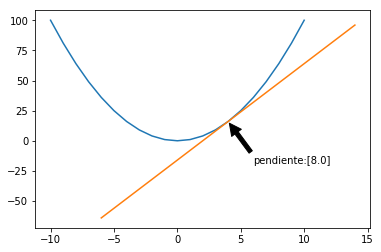

In [22]:
x_plot = np.arange(-10,11)
y_plot = np.power(x_plot,2)

plt.plot(x_plot,y_plot) # graficar la funcion
plt.plot(x_plot+x_eval,x_plot*valor_derivada + valor_y ) #graficar la recta tangente en el punto dado

plt.annotate("pendiente:{}".format(valor_derivada),(x_eval,valor_y),(x_eval +2,valor_y-35),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

#### Ejemplo 2 (composición de funciones)

Dada la función compuesta $f(g(x))$ donde:

$f(g) = 3g^3 + g^2 + 2$

y

$g(x) = x^2 + 1 $

Encontrar la derivada de $f$ respecto de $x$ evaluada en: $x=25$ y $x=6$ 

In [23]:
def f(g):
  return 3*tf.math.pow(g,3) + tf.math.pow(g,2) + 2

def g(x):
  return tf.math.square(x) + 1


x = tf.placeholder(tf.float32,[])

derivada = tf.gradients(f(g(x)),[x])

with tf.train.MonitoredSession() as session:
  feed_dict = {x:25}
  print("derivada en 25:",session.run(derivada,feed_dict))

  feed_dict = {x:6}
  print("derivada en 6:",session.run(derivada,feed_dict))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
derivada en 25: [176406800.0]
derivada en 6: [148740.0]


#### Ejemplo 3 

Calcular las derivadas parciales respecto de $a$ y $b$ de la función

$e(c(a,b),d(b))$

descrita por el siguiente grafo cuando $a=2$ y $b=1$
<img src="https://drive.google.com/uc?id=12QXjmSFGc1OD-i9dOx-o7mV9Pl7x9a7-">

###### Fuente: Deepmind y UCL

In [24]:
a = tf.placeholder(tf.float32,[]) #tensor en el grafo sin valor concreto hasta crear la sesion
b = tf.placeholder(tf.float32,[]) #tensor en el grafo sin valor concreto hasta crear la sesion
c = a + b # nodo (op) de suma
d = b + 1
e = c*d

grads = tf.gradients(e,[a,b])

with tf.Session() as session:
  feed_dictionary = {a:2.0 ,b:1.0} # enviar al placeholder "a" el valor 3.0
  print("Derivadas parciales de 'e' respecto de 'a' y 'b':")
  print(session.run(grads , feed_dict=feed_dictionary)) # ejecutar el nodo c, dandole el valor 3.0 a "a"
  
  

Derivadas parciales de 'e' respecto de 'a' y 'b':
[2.0, 5.0]


El mismo ejemplo pero convirtiendo el grafo a composición de funciones:

$e(c(a,b),d(b))$

In [25]:
def e(c,d):
  return c*d

def c(a,b):
  return a + b

def d(b):
  return b + 1

a = tf.placeholder(tf.float32,[]) 
b = tf.placeholder(tf.float32,[]) 

resultado = e(c(a,b),d(b))

grads = tf.gradients(resultado,[a,b])

with tf.Session() as session:
  feed_dict = {a:2.0,b:1.0} # enviar al placeholder "a" el valor 2.0 y a b el valor de 1.0
  print(session.run([grads,resultado] , feed_dict=feed_dict)) 

[[2.0, 5.0], 6.0]


#### Regesión Lineal - Proyecto del curso anterior.

El proyecto anterior se pudo haber resuelto con TensorFlow:



*   Cambiando np.matmul por tf.matmul
*   Definiendo la  función de costo/error con operaciones de tf
*   Calculando los gradientes del error respecto de m y b con tf.gradients







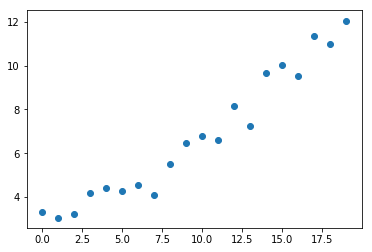

In [26]:
# Generando artificialmente un dataset pequeño

tamaño_muestra = 20
w = 0.5
b = 2

x = np.arange(tamaño_muestra)
y = x*w + b + np.random.normal(loc=0.0,scale=0.5,size=tamaño_muestra)

plt.scatter(x,y)
plt.show()

Función de costo MSE

$J(g) = (1/2)g^2$

$g(h) = h - y$

$h(w_1) = w_1x$



Por que la función de costo esta multiplicada por 1/2 ?

$f(x) = (1/2)x^2$

$f'(x) = x$


En la función $f(x,y)$ dado el punto (a,b) y el vector de dirección $\vec u$

> $\underset{\vec u}{\operatorname{max}}\ \nabla f(a,b)\cdot \vec u $

> $\vec u^* =\underset{\vec u}{\operatorname{argmax}}\ \nabla f(a,b) \cdot \vec u $

De algebra lineal (curso previo) sabemos que el producto punto es máximo cuando los vectores son iguales, por lo tanto la dirección de máximo incremento se tiene cuando:

> $\vec u = \nabla f(a,b)$

El vector gradiente de la función proporciona la dirección de máximo incremento en el punto (a,b)

In [27]:
def error(y_real,y_aprox):
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Gradiente del error respecto de m y b:
[-80.49486, -6.7752523]
Gradiente del error respecto de m y b:
[-70.48938, -6.0037766]
Gradiente del error respecto de m y b:
[-61.7269, -5.328123]
Gradiente del error respecto de m y b:
[-54.05301, -4.7363896]
Gradiente del error respecto de m y b:
[-47.332466, -4.218149]
Gradiente del error respecto de m y b:
[-41.446835, -3.764273]
Gradiente del error respecto de m y b:
[-36.29239, -3.3667636]
Gradiente del error respecto de m y b:
[-31.778296, -3.018619]
Gradiente del error respecto de m y b:
[-27.824995, -2.7137065]
Gradiente del error respecto de m y b:
[-24.362827, -2.4466553]
Gradiente del error respecto de m y b:
[-21.330772, -2.2127616]
Gradiente del error respecto de m y b:
[-18.675404, -2.0079067]
Gradiente del error respecto de m y b:
[-16.349916, -1.8284825]
Gradiente del error respecto de m y b:
[-14.313333, -1.671

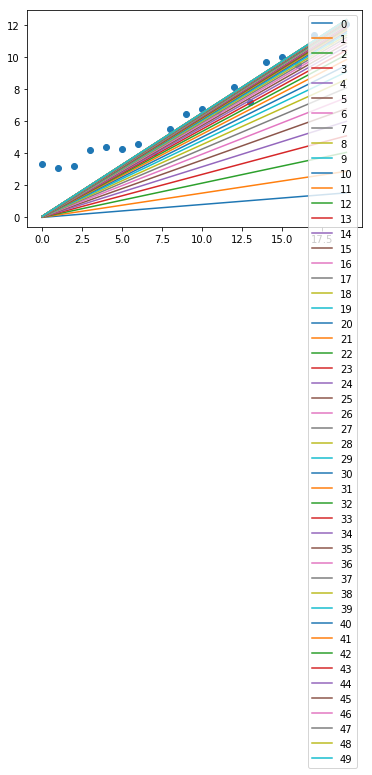

In [28]:
plt.scatter(x,y)

tf.reset_default_graph()

learning_rate = 0.001

m = tf.get_variable("pendiente",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())
b = tf.get_variable("intercepto",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())

tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

# hipotesis-modelo y = mx + b
prediccion = tf.add(tf.multiply(m,x),b)


gradiente = tf.gradients(error(tensor_y,prediccion) ,[m,b] )


actualizacion_m = tf.assign(m, m - learning_rate*gradiente[0] )
actualizacion_b = tf.assign(b, b - learning_rate*gradiente[1] )
actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

# batch gradient descent
with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(50):
    print("Gradiente del error respecto de m y b:")
    print(session.run(gradiente,feed_dict=feed_dict))

    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)
    #print(predicciones)
    plt.plot(x,predicciones,label=str(i))

plt.legend()
plt.show()

##### mismo ejemplo usando un poco de programación orientada a objetos

In [29]:
class ModeloLineal:
  def __init__(self):
    tf.reset_default_graph()
    self.m = tf.get_variable("pendiente",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())
    self.b = tf.get_variable("intercepto",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())

  def __call__(self,x):
    return self.m*x + self.b

  def actualizar(self,x,y,learning_rate):
    prediccion = self(x)
    error = 1/2*tf.reduce_mean(tf.math.square(y - prediccion) )
    gradiente = tf.gradients(error,[self.m,self.b])
    actualizacion_m = tf.assign(self.m, self.m - learning_rate*gradiente[0] )
    actualizacion_b = tf.assign(self.b, self.b - learning_rate*gradiente[1] )
    actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

    return actualizacion_parametros

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


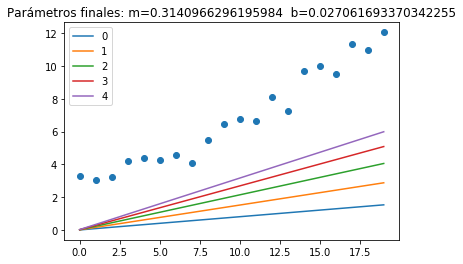

In [30]:
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.001

tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(5):
    
    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

### Optimizadores y otras utilidades de TensorFlow

El calcular gradientes y aplicar actualizaciones con estos son operaciones muy comunes en ML, por lo tanto TensorFlow contiene pre-definidas multiples operaciones y  **componentes de alto nivel** comunes como optimizadores. Por ejemplo:



*   tf.train.GradientDescentOptimizer
*   tf.train.RMSPropOptimizer
*   tf.train.AdamOptimizer





INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Gradiente del error respecto de m y b:
[0.0, 0.0]
Gradiente del error respecto de m y b:
[0.16098972, 0.013550505]
Gradiente del error respecto de m y b:
[0.2819575, 0.024015106]
Gradiente del error respecto de m y b:
[0.37284744, 0.032160386]
Gradiente del error respecto de m y b:
[0.44113278, 0.03856247]
Gradiente del error respecto de m y b:
[0.49243, 0.043654326]
Gradiente del error respecto de m y b:
[0.5309601, 0.04776135]
Gradiente del error respecto de m y b:
[0.5598952, 0.051128093]
Gradiente del error respecto de m y b:
[0.5816194, 0.053938333]
Gradiente del error respecto de m y b:
[0.5979243, 0.056330193]
Gradiente del error respecto de m y b:
[0.6101564, 0.058407478]
Gradiente del error respecto de m y b:
[0.6193277, 0.060248196]
Gradiente del error respecto de m y b:
[0.62619877, 0.06191098]
Gradiente del error respecto de m y b:
[0.6313411, 0.06343988]


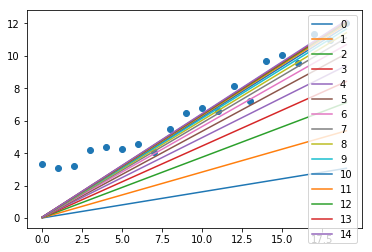

In [31]:
plt.scatter(x,y)

tf.reset_default_graph()

learning_rate = 0.001

m = tf.get_variable("pendiente",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())
b = tf.get_variable("intercepto",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())

tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

prediccion = tf.add(tf.multiply(m,tensor_x),b)
error = tf.losses.mean_squared_error(tensor_y,prediccion)
actualizacion_parametros = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(error)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(15):
    print("Gradiente del error respecto de m y b:")
    print(session.run([m,b],feed_dict=feed_dict))

    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

plt.legend()
plt.show()

### Variaciones de gradient descent

Gradient descent es el algoritmo de optimizacion base, pero existen otros (y variaciones de este) . Variaciones importantes son:

* **Batch Gradient Descent** : en cada iteracion utiliza todos los datos de entrenamiento para calcular el gradiente (como el promedio de gradientes para cada observacion).
* **Stochastic gradient descent** : se utiliza un unico ejemplo de entreamiento(oservacion) en cada iteracion del algoritmo.
* **Mini-batch gradient descent** : en cada iteracion utiliza una muestra (sin remplazo) del dataset con un tamanio dado como hyper-parametro (normalmente en potencias de 2)

#### Batch Gradient Descent

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


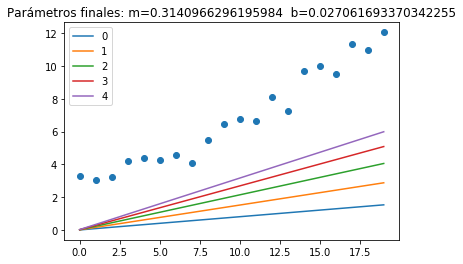

In [32]:
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.001

tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(5): # iteracines = epochs
    
    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

#### Stochastic Gradient Descent

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


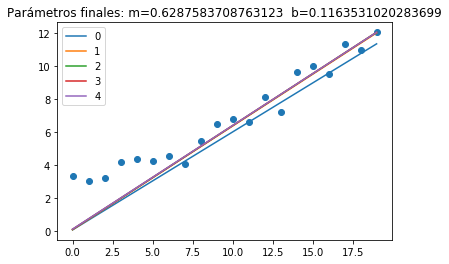

In [33]:
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.001

tensor_x = tf.placeholder(tf.float32,[None,1],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[None,1],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  
  for i in range(5): #5 epochs
    
    for (x_stoc, y_stoc) in zip(x, y):  #muchas iteraciones por epoch (20)
      x_stoc = np.array([x_stoc]).reshape([1,1])
      y_stoc = np.array([y_stoc]).reshape([1,1])
      feed_dict = {tensor_x:x_stoc, tensor_y:y_stoc}
      session.run(actualizacion_parametros,feed_dict=feed_dict)

    feed_dict = {tensor_x:np.array(x).reshape(-1,1), tensor_y:np.array(y).reshape(-1,1)}
    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

#### Mini-batch gradient descent

4
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch 0 iteracion 0 m=0.00794471986591816 b=0.0036429769825190306
Epoch 0 iteracion 1 m=0.0434090718626976 b=0.008559081703424454
Epoch 0 iteracion 2 m=0.1305384337902069 b=0.015720106661319733
Epoch 0 iteracion 3 m=0.27685439586639404 b=0.02427741512656212
Epoch 1 iteracion 0 m=0.28308942914009094 b=0.027342405170202255
Epoch 1 iteracion 1 m=0.3043555021286011 b=0.030308797955513
Epoch 1 iteracion 2 m=0.3531256914138794 b=0.034316714853048325
Epoch 1 iteracion 3 m=0.4343526065349579 b=0.03907144069671631
Epoch 2 iteracion 0 m=0.43961307406425476 b=0.04180664196610451
Epoch 2 iteracion 1 m=0.45279520750045776 b=0.0436629056930542
Epoch 2 iteracion 2 m=0.4797329604625702 b=0.045876193791627884
Epoch 2 iteracion 3 m=0.5239206552505493 b=0.048467036336660385
Epoch 3 iteracion 0 m=0.5286248922348022 b=0.051013704389333725
Epoch 3 iteracion 1 m=0.5372029542922974 b=0.052

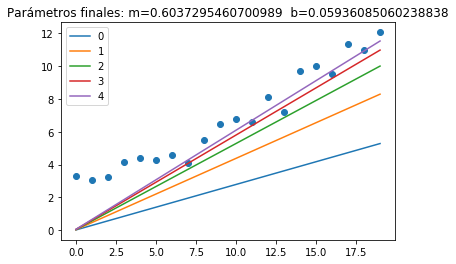

In [34]:
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.001
batch_size = 5 # 2, 4, 8  , 16, 32 #hyper-parametro
epochs = 5
total_iteraciones = int(tamaño_muestra/batch_size)

print(total_iteraciones)

tensor_x = tf.placeholder(tf.float32,[None,1],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[None,1],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  
  for epoch in range(epochs): #5 epochs
    #shuffle(x,y) # buena practica (ordenar aleatoriamente)
    
    for i in range(total_iteraciones):  #muchas iteraciones por epoch 
      muestra_inicio = i*batch_size
      muestra_fin = muestra_inicio + batch_size
      x_mb =  np.array(x[muestra_inicio:muestra_fin]).reshape([-1,1])
      y_mb = np.array(y[muestra_inicio:muestra_fin]).reshape([-1,1])
      
      feed_dict = {tensor_x:x_mb, tensor_y:y_mb}
      _,m,b = session.run([actualizacion_parametros,modelo.m,modelo.b],feed_dict=feed_dict)

      print("Epoch {} iteracion {} m={} b={}".format(epoch,i,m,b))

    feed_dict = {tensor_x:np.array(x).reshape(-1,1), tensor_y:np.array(y).reshape(-1,1)}
    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(epoch))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

In [49]:
t = tf.placeholder(tf.float32,[])
u = t**2
v = 5*t-8
w = t**3+t

z= u**2*v**3*w**4


d = tf.gradients(z,[t])

with tf.train.MonitoredSession() as s:
    fd = {t:0.6}
    print(s.run(d,fd))


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[-99.5692]


In [56]:
t = tf.placeholder(tf.float32,[])
x = tf.placeholder(tf.float32,[])
y = tf.placeholder(tf.float32,[])

u = t**2+2*x+y
v = 5*t+8*x
w = t**3+t+y
z = u**2*v**3*w**4

d = tf.gradients(z,[u,v,w])
with tf.train.MonitoredSession() as s:
    fd = {t:0.6,x:0.1,y:0.2}
    print(s.run(d,fd))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[88.87288, 26.661863, 132.95941]
